<a href="https://colab.research.google.com/github/calaghanjo/Class-with-Pred-Recall/blob/main/Weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv('/content/Project 1 - Weather Dataset.csv')

In [3]:
dataset

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [4]:
dataset['Weather'].value_counts()

,count
Weather,
Mainly Clear,2106
Mostly Cloudy,2069
Cloudy,1728
Clear,1326
Snow,390
Rain,306
Rain Showers,188
Fog,150
"Rain,Fog",116


In [5]:
def simplify_weather(cond):
    cond = str(cond).lower()
    if "clear" in cond:
        return "Clear"
    elif "cloudy" in cond or "fog" in cond or "haze" in cond:
        return "Cloudy"
    elif "rain" in cond or "drizzle" in cond or "thunder" in cond:
        return "Rain"
    elif "snow" in cond or "pellet" in cond:
        return "Snow"
    else:  # freezing, mixed, ice, grains etc.
        return "Mixed/Freezing"


In [14]:
dataset["Weather"] = dataset["Weather"].apply(simplify_weather)

dataset["Weather"].value_counts()

,count
Weather,
Cloudy,4252
Clear,3432
Rain,618
Snow,482


In [7]:
X=dataset[['Temp_C','Dew Point Temp_C','Rel Hum_%','Wind Speed_km/h','Visibility_km','Press_kPa']]

In [8]:
Y=dataset[['Weather']]

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,Y_train,Y_test=train_test_split (X,Y,test_size=0.22,random_state=62)

In [11]:
from sklearn.tree import DecisionTreeClassifier, plot_tree


In [16]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [20]:
Y_pred=model.predict(X_test)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have y_test and y_pred
print("Classification Report:")
print(classification_report(Y_test, Y_pred))

print("Confusion Matrix:")
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

Classification Report:
              precision    recall  f1-score   support

       Clear       0.58      0.77      0.66       767
      Cloudy       0.62      0.51      0.56       941
        Rain       0.00      0.00      0.00       121
        Snow       0.54      0.67      0.60       104

    accuracy                           0.59      1933
   macro avg       0.43      0.49      0.46      1933
weighted avg       0.56      0.59      0.57      1933

Confusion Matrix:
[[594 170   0   3]
 [413 481   0  47]
 [ 15  96   0  10]
 [  8  26   0  70]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



## Key Metrics Explained

- **Precision**: For each class, precision tells you how many of the items **predicted as that class were actually correct**. High precision means few false positives (incorrect predictions for that class.
- **Recall**: For each class, recall is the percentage of items **actually belonging to that class that the model correctly identified**. High recall means few false negatives (missed true items of that class.
- **F1-Score**: This is the **harmonic mean of precision and recall**. It balances the two, and is especially useful if you care equally about precision and recall.
- **Support**: Number of true instances for each class in your dataset. This provides context for the performance metrics.



## Interpreting Your Classification Report

| Class   | Precision | Recall | F1-score | Support |
|---------|-----------|--------|----------|---------|
| Clear   | 0.58      | 0.77   | 0.66     | 767     |
| Cloudy  | 0.62      | 0.51   | 0.56     | 941     |
| Rain    | 0.00      | 0.00   | 0.00     | 121     |
| Snow    | 0.54      | 0.67   | 0.60     | 104     |

- **Clear**: The model correctly identifies 77% of actual clear cases (high recall), but only 58% of predicted clear are truly clear (moderate precision).
- **Cloudy**: The model is moderate in both picking out cloudy cases (recall 51%) and being correct when it does (precision 62%).
- **Rain**: 0% in all metrics means your model fails to correctly identify or predict this class—possibly due to very few rain cases (support=121) or poor learning.
- **Snow**: The model finds 67% of snow events and is correct 54% of the time it predicts snow.

***

## Overall Model Metrics

- **Accuracy (0.59)**: The model was correct for 59% of all predictions on this data. This alone can be misleading, especially with class imbalance.[6]
- **Macro avg**: A simple average of the metric across all classes, treating them equally (regardless of support). Macro F1=0.46 means the model struggles overall, especially with minor classes like Rain.
- **Weighted avg**: This averages while taking into account the number of samples per class (support), reflecting the performance on the most common classes more heavily. The weighted F1=0.57 is slightly better due to better performance on 'Clear' and 'Cloudy'.



### Key Takeaways

- The model distinguishes “Clear” and “Snow” reasonably, but performs poorly on "Rain".
- Low recall or F1 (especially for “Rain”) shows the model rarely recognizes events in that class, which could indicate class imbalance or insufficient training data.[4][6]
- Improving “Rain” performance may require more data, better features, or different modeling approaches.

***

**Summary of metric meanings:**
- **Precision**: How many predicted were truly that class?
- **Recall**: How many of the actual class were found?
- **F1-score**: Harmonic mean; balances the two.
- **Support**: Actual amount of this class in the data.[4][6]




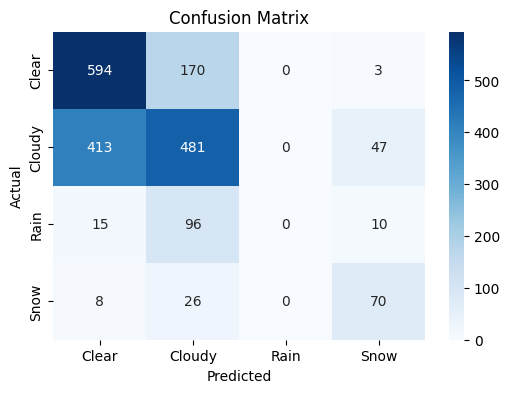

In [22]:
# Plot confusion matrix heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()